In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas as pd

### Choose singe `results.*` file

In [2]:
result_root = "/Users/rzamora/IO/CCIO/xgitlabrepos/pnetcdf_vol/cdf/run/results"
camp_name = "hdf5-cdfvl-20190417"
case_name = "count.52.size.8.nodes.8.ppn.32"
jobid = 330925

result_path = result_root +"/"+ camp_name +"/"+ case_name +"/results."+ str(jobid)
size_ind = 1
time_ind = 2
band_ind = 3

table_dict = { "Procs": [],
               "Library": [],
               "Case": [],
               "Size": [],
               "Time": [],
               "Bandwidth": []}

### Parse file and populate the `table_dict` dictionary

In [3]:
with open(result_path, 'r') as f:
	case = "None"
	procs = 0
	while True:
		line = f.readline()
		if not line: break
		fsplt = line.split()
		if len(fsplt)>0:
			if   fsplt[0]=="[Independent]:":
				case = "Independent"; procs = int(fsplt[1])
			elif fsplt[0]=="[Collective]:":
				case = "Collective"; procs = int(fsplt[1])
			elif fsplt[0]=="[Independent-Records]:":
				case = "Independent-Records"; procs = int(fsplt[1])
			elif fsplt[0]=="[Collective-Records]:":
				case = "Collective-Records"; procs = int(fsplt[1])
			elif case != "None":
				library = "None"
				if   fsplt[0]=="CDF_READ_HYPER:":
					library = "PnetCDF"
				elif fsplt[0]=="CDFVL_READ_HYPER:":
					library = "VOL"
				if library != "None":
					table_dict["Procs"].append(procs)
					table_dict["Library"].append(library)
					table_dict["Case"].append(case)
					table_dict["Size"].append(float(fsplt[size_ind].split("=")[1]))
					table_dict["Time"].append(float(fsplt[time_ind].split("=")[1]))
					table_dict["Bandwidth"].append(float(fsplt[band_ind].split("=")[1]))

### Convert the dictionary to a dataframe

In [61]:
df = pd.DataFrame.from_dict(table_dict)
df.head()

,Procs,Library,Case,Size,Time,Bandwidth
0,256,PnetCDF,Independent,512.0,3.880967,131.925887
1,256,VOL,Independent,512.0,4.006234,127.800825
2,256,PnetCDF,Independent,512.0,4.098140,124.934726
3,256,VOL,Independent,512.0,4.047036,126.512343
4,256,PnetCDF,Independent,512.0,3.876650,132.072792


('PnetCDF', 'Collective')
('PnetCDF', 'Collective-Records')
('PnetCDF', 'Independent')
('PnetCDF', 'Independent-Records')
('VOL', 'Collective')
('VOL', 'Collective-Records')
('VOL', 'Independent')
('VOL', 'Independent-Records')


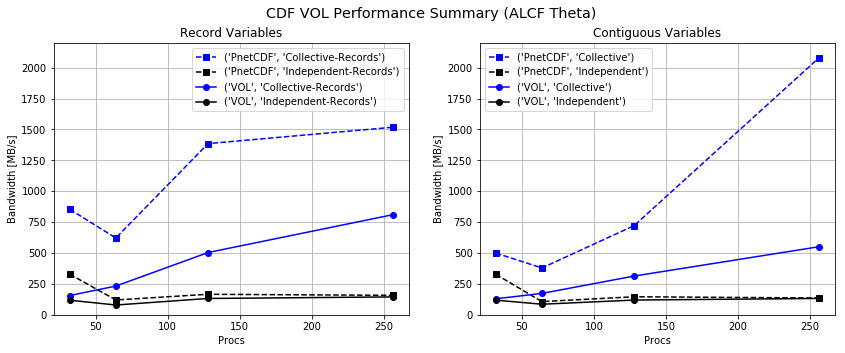

In [138]:
grouped = df.drop(columns=['Size']).groupby(["Library", "Case"])

ax_fix = None
ax_rec = None


fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('CDF VOL Performance Summary (ALCF Theta)', fontsize="x-large")

for name,group in grouped:
    print(name)
    rec = name[1] == 'Collective-Records' or name[1] == 'Independent-Records'
    
    mkr1 = 'k'
    if name[1] == 'Collective-Records' or name[1] == 'Collective': mkr1 = 'b'
        
    mkr2 = 'o-'
    if name[0] == 'PnetCDF': mkr2 = 's--'
    
    dfs = group.groupby(["Procs"]).mean()
    if rec:
        #dfs.plot(ax=ax_rec, use_index=True, y="Bandwidth", label=name, logy=True, marker=mkr)
        ax[0].plot(dfs.index.tolist(), dfs["Bandwidth"].tolist(), mkr1+mkr2, label=name)
    else:
        #dfs.plot(ax=ax_fix, use_index=True, y="Bandwidth", label=name, logy=True, marker=mkr)
        ax[1].plot(dfs.index.tolist(), dfs["Bandwidth"].tolist(), mkr1+mkr2, label=name)

#grouped.get_group("PnetCDF")
#dfs
ax[0].legend(loc='best')
ax[0].set_title('Record Variables')
ax[0].set_ylim(0, 2200)
ax[0].set_xlabel('Procs')
ax[0].set_ylabel('Bandwidth [MB/s]')
ax[0].grid(True)

ax[1].legend(loc='best')
ax[1].set_title('Contiguous Variables')
ax[1].set_ylim(0, 2200)
ax[1].set_xlabel('Procs')
ax[1].set_ylabel('Bandwidth [MB/s]')
ax[1].grid(True)
plt.show()

#fig.savefig('fig1.png', dpi = 300)
#fig.close()